# Measurements & Plots for the article

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import json
from math import log2

In [15]:
def mpi_draw_plot(mpi_1_blade, mpi_2_blades, mpi_4_blades, test_name, yticks):
    cores = [1, 2, 4, 8, 16, 32, 64, 128]
    ticks_tot = [i for i in range(len(cores))]
    ticks_1 = [i for i in range(len(cores) - 2)]
    ticks_2 = [i+1 for i in range(len(cores) - 2)]
    ticks_4 = [i+2 for i in range(len(cores) - 2)]

    plt.figure(figsize=(12, 4), layout='constrained')
    plt.xticks(ticks_tot, cores)
    plt.yticks(yticks)

    for i in ticks_tot:
        leg1, leg2, leg3 = f"{mpi_1_blade[i]}s", f"{mpi_2_blades[i-1]}s" if i-1 >= 0 else "N/A", f"{mpi_4_blades[i-2]}s" if i-2 >= 0 else "N/A"

        custom_y = [35, 25, 15]
        if i == 0:
            custom_y = [-45, -55, -65]
        if i == 1:
            custom_y = [45, 35, 25]

        label_y = max(mpi_1_blade[i], mpi_2_blades[i], mpi_4_blades[i])

        plt.annotate(f'{leg1}', (i, label_y), textcoords="offset points", xytext=(5, custom_y[0]), ha='center', color="#FFAD33")
        plt.annotate(f'{leg2}', (i, label_y), textcoords="offset points", xytext=(5, custom_y[1]), ha='center', color="#13B151")
        plt.annotate(f'{leg3}', (i, label_y), textcoords="offset points", xytext=(5, custom_y[2]), ha='center', color="#8313B1")

    # plt.plot(ticks, seq, label="Sequential")
    plt.plot(ticks_1, mpi_1_blade, label="MPI with 1 node", color="#FFAD33")
    plt.plot(ticks_2, mpi_2_blades, label="MPI with 2 nodes", color="#13B151")
    plt.plot(ticks_4, mpi_4_blades, label="MPI with 4 nodes", color="#8313B1")
    plt.xlabel("Total number of cores $n$")
    plt.ylabel("Total runtime $t$ (in $s$)")
    plt.legend()
    plt.title(f"MPI timings on different number of cores, with the {test_name} test")
    plt.grid(ls="--", c="#E8E8E8")
    plt.show()
    return None



def mpi_plot(file, test_name, yticks):
    mpi_data_dict = {
        "1_blade": [0 for _ in range(6)],
        "2_blades": [0 for _ in range(6)],
        "4_blades": [0 for _ in range(6)]
    }

    with open(f"./measurements/mpi/{file}", "r", encoding="utf-8") as file:
        json_data = file.read()
        measurements = json.loads(json_data)

        for k, v in measurements.items():
            mean = round(sum(v) / 5, 6)
            index = int(log2(int(k[8:])))
            if k[2] == "1":
                mpi_data_dict["1_blade"][index] = mean
            if k[2] == "2":
                mpi_data_dict["2_blades"][index] = mean
            if k[2] == "4":
                mpi_data_dict["4_blades"][index] = mean
            

    mpi_draw_plot(mpi_data_dict["1_blade"], mpi_data_dict["2_blades"], mpi_data_dict["4_blades"], test_name, yticks)

IndexError: list index out of range

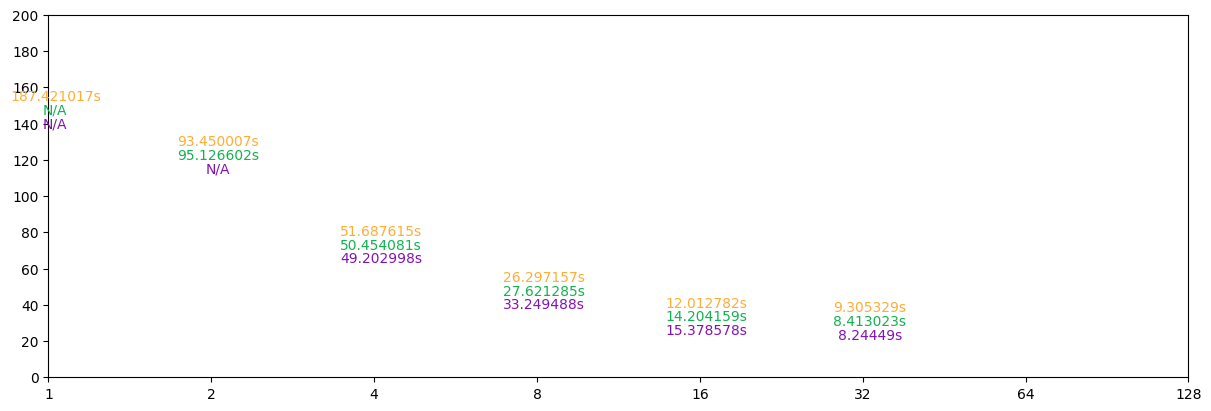

In [18]:
mpi_plot("mpi_scrape_100d2.json", "input100D2", [i*20 for i in range(11)])
mpi_plot("mpi_scrape_100d4.json", "input100D4", [i*100 for i in range(22)])

In [6]:
cores = [1, 2, 4, 8, 16, 32, 64]
seq = [390.007038 for _ in range(len(cores))]

mpi_1_blade = [186.330804,
       93.181741,
       46.803297,
       23.506253,
       12.222562,
       6.719691,
       4.124891]
mpi_2_machines = [#0,
                  93.209309,
                  46.745442,
                  23.958420,
                  12.602155,
                  (7.543724 + 7.955295)/2,
                  round((7.536544 + 8.529703 + 9.229490)/3, 6)]
mpi_4_machines = [#0,
                  48.039279,
                  25.621132,
                  13.222755,
                  8.200223,
                  7.087500]




mpi_plot(mpi_1_blade, mpi_2_machines, mpi_4_machines, "input100D2")

# 8.480812 con 4 * 32 cores

TypeError: mpi_plot() takes 3 positional arguments but 4 were given